In [ ]:
import requests

# Sentinel Hub API endpoint
url = "https://services.sentinel-hub.com/api/v1/process"

# Authorization token
headers = {
    "Authorization": "Bearer <your access token>",
}

# Payload
request_payload = {
    "input": {
        "bounds": {
            "properties": {
                "crs": "http://www.opengis.net/def/crs/EPSG/0/32633"
            },
            "bbox": [562218, 5174019, 564201, 5172501]
        },
        "data": [
            {
                "type": "byoc-906b545b-4305-4968-b245-2abcb0609bc1",
                "dataFilter": {
                    "timeRange": {
                        "from": "2021-08-20T00:00:00Z",
                        "to": "2021-08-20T23:59:59Z"
                    }
                }
            }
        ]
    },
    "output": {
        "resx": 3,
        "resy": 3
    }
}

# Evalscript
evalscript = """//VERSION=3
function setup() {
  return {
    input: [{"bands": ["blue", "green", "red"]}],
    output: { bands: 3 }
  };
}
function evaluatePixel(sample) {
  return [2.5 * sample.red / 10000,
          2.5 * sample.green / 10000,
          2.5 * sample.blue / 10000];
}"""

# Files for POST request
files = {
    "request": (None, str(request_payload)),
    "evalscript": (None, evalscript),
}

# Send the POST request
response = requests.post(url, headers=headers, files=files)

# Print the response
print(response.status_code)
print(response.json())


In [1]:
import xarray as xr
url = "https://s3.eu-central-1.amazonaws.com/deep-esdl-public/esdc-8d-0.25deg-1x720x1440-3.0.1.zarr"
cube = xr.open_zarr(url)
cubekeys=list(cube.data_vars.keys()) #get the kexs for each var
cube

<xarray.Dataset> Size: 353GB
Dimensions:                            (time: 1978, lat: 720, lon: 1440)
Coordinates:
  * lat                                (lat) float64 6kB -89.88 -89.62 ... 89.88
  * lon                                (lon) float64 12kB -179.9 ... 179.9
  * time                               (time) datetime64[ns] 16kB 1979-01-05 ...
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 16GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cot                                (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cth                                (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

In [ ]:
ds=cube["air_temperature_2m"]
lat_res = abs(ds['lat'].diff('lat').mean().item())
lon_res = abs(ds['lon'].diff('lon').mean().item())

print(f"Spatial resolution:")
print(f"lat resolution: {lat_res} degrees")
print(f"lon resolution: {lon_res} degrees")

In [5]:
ds=cube["air_temperature_2m"]
ds

<xarray.DataArray 'air_temperature_2m' (time: 1978, lat: 720, lon: 1440)> Size: 8GB
dask.array<open_dataset-air_temperature_2m, shape=(1978, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 16kB 1979-01-05 1979-01-13 ... 2021-12-31
Attributes: (12/25)
    acknowledgment:             ERA5 hourly data on single levels from 1959 t...
    date_modified:              2022-11-04 15:41:36.233472
    description:                ERA5 Reanalysis Products
    geospatial_lat_max:         89.875
    geospatial_lat_min:         -89.875
    geospatial_lat_resolution:  0.25
    ...                         ...
    standard_name:              mean_air_temperature_2m
    temporal_resolution:        8D
    time_coverage_end:          2021-12-27T00:00:00.000000000
    time_coverage_start:        1979-01-01T00:00:00.000000000
    time_period:                8D
    units:                      °C

In [7]:
ds_sel=ds.sel(lat=slice(50,54), lon=slice(-10, -6)).sel(time="2021-12-31")

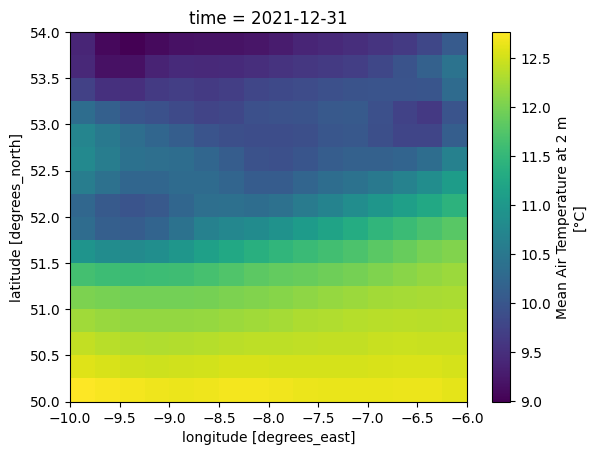

In [8]:
ds_sel.plot()